# BANK APP REVIEWS - DASHEN

In [5]:
#auto loading
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 🧱 1. Setup & Imports

In [6]:
import warnings
import pandas as pd
from data.data_quality_utils import DataQualityUtils
from data.load_data import load_local_data
from visualization.visualizer import ReviewVisualizer

In [7]:
warnings.filterwarnings("ignore")

In [8]:
# variable
BANK="Dashen"

In [9]:
#paths
RAW_DATA_PATH='../../data/raw/'+BANK+'_raw_reviews.csv'
CLEANED_DATA_PATH='../../data/interim/'+BANK+'_cleaned_reviews.csv'

## 📦 2. Data Loading & Overview  <a id= '2-data-loading--overview'></a>

In [10]:
# Load the stock news sentiment data
df = load_local_data(RAW_DATA_PATH,)
df.head()

INFO:data.load_data:Loading data from: /home/teshager/Documents/10Academy/repositories/projects/customer-experience-analytics-for-fintech-apps/data/raw/Dashen_raw_reviews.csv (type=csv)
INFO:data.load_data:Data loaded successfully. Shape: (448, 10)


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,22818807-3368-446c-8a3b-d3ca2e07a2d8,OBSA KA,https://play-lh.googleusercontent.com/a-/ALV-U...,love,3,0,1.0.16,2025-06-06 00:15:44,NaN,NaN
1,6ece1f5e-55f2-404d-b980-1cb45823180f,Masersha,https://play-lh.googleusercontent.com/a/ACg8oc...,መቸሸጠ,5,0,1.0.16,2025-06-03 19:40:31,NaN,NaN
2,765ff69f-5274-45c5-985b-81b8d01e1874,Koki Mulugeta,https://play-lh.googleusercontent.com/a/ACg8oc...,wow,5,0,NaN,2025-06-03 17:30:11,NaN,NaN
3,7db66b6a-a044-43f1-a7ad-ea8a10815548,Badhasa Dassaalany,https://play-lh.googleusercontent.com/a/ACg8oc...,gadaa,5,0,1.0.16,2025-06-01 17:10:53,NaN,NaN
4,caf4a80c-85db-4b49-ab9c-a0b55e152317,Nebiyu Getachew Mamo,https://play-lh.googleusercontent.com/a-/ALV-U...,Massive upgrade from the Amole app.,5,0,1.0.16,2025-05-31 23:04:04,NaN,NaN


### Dataset Overview

In [11]:
#view sample data
df.sample(10)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
430,bdfd757f-9d41-450e-a765-96219cf37841,Dereje Belay,https://play-lh.googleusercontent.com/a-/ALV-U...,"Truly, db => AlwaysOneStepAhead !!",5,3,1.0.3,2025-01-14 21:37:50,NaN,NaN
336,7a363704-a9b9-4805-99ce-288543537fc5,Amanuel Teklay,https://play-lh.googleusercontent.com/a-/ALV-U...,it's amazing app i have seen ever,5,3,1.0.7,2025-02-13 22:00:54,NaN,NaN
128,328e442a-c92a-42dc-a91c-44d71556a34e,Helen Tigistu,https://play-lh.googleusercontent.com/a/ACg8oc...,one of the best digital platforms I've used! f...,5,3,1.0.14,2025-04-21 22:32:42,NaN,NaN
139,31eddf1f-9725-472b-b29a-53377dac71ca,Yihnalem Aknaw,https://play-lh.googleusercontent.com/a/ACg8oc...,"It is,really super because of its unique offer...",5,8,1.0.15,2025-04-21 17:57:03,NaN,NaN
371,060af032-65e4-4574-a5fd-5318accf9982,Bereket Zerihun,https://play-lh.googleusercontent.com/a-/ALV-U...,Just Wow,5,3,1.0.4,2025-01-29 08:41:59,NaN,NaN
69,4e018789-e27b-4b7c-b1d4-f79dd0affa68,Nesru “Nesrudin” Dendir,https://play-lh.googleusercontent.com/a-/ALV-U...,yes i want dashen super open,5,2,1.0.16,2025-05-02 23:55:12,NaN,NaN
444,cad7278a-410d-4eed-805d-d1a942009cc3,TSEGAW WORKIE,https://play-lh.googleusercontent.com/a/ACg8oc...,"Waw Great and innovated,user friendly, always ...",5,27,1.0.1,2025-01-13 21:01:12,NaN,NaN
174,fdcc34cc-699d-46ba-bcde-69f82e340aa4,Tensae Mulugeta,https://play-lh.googleusercontent.com/a-/ALV-U...,"easy &,simple to use",5,2,1.0.15,2025-04-21 14:06:30,NaN,NaN
377,3ab4ca6d-3d00-417c-93da-3eb40592a726,Degu Ye,https://play-lh.googleusercontent.com/a/ACg8oc...,V good ❗️,5,3,NaN,2025-01-24 09:40:41,NaN,NaN
289,ab2084ae-01be-4061-a4ba-0d5db11e2874,Zulthan Two,https://play-lh.googleusercontent.com/a/ACg8oc...,Best,5,2,1.0.14,2025-03-20 13:16:10,NaN,NaN


In [12]:
#see the last rows
df.tail()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
443,650ad650-9821-4bda-a43f-88fec69ab680,Geresu Ku,https://play-lh.googleusercontent.com/a-/ALV-U...,Best,5,5,NaN,2025-01-13 21:11:58,NaN,NaN
444,cad7278a-410d-4eed-805d-d1a942009cc3,TSEGAW WORKIE,https://play-lh.googleusercontent.com/a/ACg8oc...,"Waw Great and innovated,user friendly, always ...",5,27,1.0.1,2025-01-13 21:01:12,NaN,NaN
445,b92aaec0-99b9-49ac-ae55-03c04a52aec5,Kemal Keyire,https://play-lh.googleusercontent.com/a-/ALV-U...,It's Best waww 🙏,5,15,1.0.1,2025-01-13 09:37:19,NaN,NaN
446,7ed6c112-916c-44c2-b0ae-af2ff9d8c58f,Anwarf ahmed,https://play-lh.googleusercontent.com/a/ACg8oc...,Always one step ahead,5,22,1.0.1,2025-01-13 09:15:03,NaN,NaN
447,60f2b9c0-9fc9-49d9-97c8-7c1f9aca05fe,Abdulmejid Abdela,https://play-lh.googleusercontent.com/a-/ALV-U...,"Like Me, I Hope It Works Better Than Before.",5,18,1.0.0,2025-01-11 11:36:49,NaN,NaN


In [13]:
#shape of the dataset
df.shape

(448, 10)

In [14]:
df.columns

Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt'],
      dtype='object')

## 📐 3. Data Types & Basic Stats <a id='3-data-types--basic-stats'></a>

In [15]:
#Numerical Columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
score,448.0,4.475446,1.201909,1.0,5.0,5.0,5.0,5.0
thumbsUpCount,448.0,7.176339,24.049123,0.0,2.0,2.0,4.0,226.0
replyContent,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
repliedAt,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
#for columns of object type
df.describe(include=['O']).T

,count,unique,top,freq
reviewId,448,448,0a694319-1c5e-4541-9a4c-048c16dcbf4f,1
userName,448,448,Sabri Mohammed,1
userImage,448,448,https://play-lh.googleusercontent.com/a/ACg8oc...,1
content,448,407,good,11
reviewCreatedVersion,357,11,1.0.14,99
at,448,448,2025-01-14 21:16:40,1


In [17]:
# data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448 entries, 0 to 447
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   reviewId              448 non-null    object 
 1   userName              448 non-null    object 
 2   userImage             448 non-null    object 
 3   content               448 non-null    object 
 4   score                 448 non-null    int64  
 5   thumbsUpCount         448 non-null    int64  
 6   reviewCreatedVersion  357 non-null    object 
 7   at                    448 non-null    object 
 8   replyContent          0 non-null      float64
 9   repliedAt             0 non-null      float64
dtypes: float64(2), int64(2), object(6)
memory usage: 35.1+ KB


In [18]:
#distinct values in each column
df.nunique().sort_values(ascending=False)

reviewId                448
userName                448
userImage               448
at                      448
content                 407
thumbsUpCount            38
reviewCreatedVersion     11
score                     5
replyContent              0
repliedAt                 0
dtype: int64

## 🔍 4. Data Quality Analysis <a id='4-data-quality-analysis'></a>

In [19]:
#instantiate the DataQualityUtils class
dq=DataQualityUtils(df)

In [20]:
#count of missing values per column
dq.summary()

,#missing_values,percentage
repliedAt,448,100.00%
replyContent,448,100.00%
reviewCreatedVersion,91,20.31%
reviewId,0,0.00%
userName,0,0.00%
userImage,0,0.00%
thumbsUpCount,0,0.00%
score,0,0.00%
content,0,0.00%
at,0,0.00%


### Missing Values

In [21]:
#column with >5% nulls
dq.columns_with_significant_missing_values(threshold=5)

,#missing_values,percentage
replyContent,448,100.00%
repliedAt,448,100.00%
reviewCreatedVersion,91,20.31%


### Duplicates

In [22]:
#count duplicates
dq.count_duplicates()

np.int64(0)

In [23]:
#look at the duplicates
dq.display_duplicates()

[INFO] Found 0 duplicated row(s).


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt


### Invalid Values

In [24]:
dq.find_invalid_values()

{}

## 🧹 5. Data Cleaning  <a id='5-data-cleaning'></a>

In [25]:
#saving the original dataset for later use
df_original=df.copy()

In [26]:
#drop duplicated rows
dq.drop_duplicates().sample(5)

[INFO] Dropped 0 duplicate row(s).


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
124,9b5d99cc-8b0e-46d5-a846-ece397be1d99,Asefa,https://play-lh.googleusercontent.com/a/ACg8oc...,Assefa Genetu = Dashen superup is the latest a...,5,2,1.0.15,2025-04-22 06:14:51,NaN,NaN
128,328e442a-c92a-42dc-a91c-44d71556a34e,Helen Tigistu,https://play-lh.googleusercontent.com/a/ACg8oc...,one of the best digital platforms I've used! f...,5,3,1.0.14,2025-04-21 22:32:42,NaN,NaN
17,4a9c5167-439a-4c99-a6d4-ad143b13bcd8,Tewodros Tsegayeed,https://play-lh.googleusercontent.com/a-/ALV-U...,nice application,5,0,1.0.16,2025-05-27 14:31:31,NaN,NaN
131,dd0238ce-336d-4dac-832c-8d01f44faf0a,Dagmawi Tadesse,https://play-lh.googleusercontent.com/a-/ALV-U...,Easy to use and has many options. It is the be...,5,3,1.0.15,2025-04-21 21:20:16,NaN,NaN
366,173957b9-fba2-4a7e-b9bc-ec34bbe0b52a,bereket abu,https://play-lh.googleusercontent.com/a-/ALV-U...,it was amazing app.....thank you dashen bank....,5,4,1.0.6,2025-01-30 23:28:41,NaN,NaN


In [27]:
# Check for duplicates again after dropping
dq.display_duplicates()

[INFO] Found 0 duplicated row(s).


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt


In [28]:
# Drop rows missing significant columns
dq.drop_rows_with_missing_in_columns(['content','score']).sample(5)

[INFO] Dropped 0 row(s) with missing values in columns: ['content', 'score']


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
207,02b8cc52-e23d-4b2f-b1e5-576c3560b859,Tamiru Abera,https://play-lh.googleusercontent.com/a-/ALV-U...,"Dear Users of the Dashen Bank Super App,I have...",5,3,NaN,2025-04-21 11:35:59,NaN,NaN
80,17d46982-18ec-43a9-85f3-0ff927671f95,Hailu Regasa,https://play-lh.googleusercontent.com/a/ACg8oc...,best of best,5,1,NaN,2025-04-29 10:37:26,NaN,NaN
266,a4192549-595f-4a95-871b-aa0f9f14e4a2,MOHAMMED KUBI ZINABU,https://play-lh.googleusercontent.com/a-/ALV-U...,perfect,5,2,1.0.14,2025-04-03 02:17:59,NaN,NaN
65,f2852962-b983-44af-b296-241a3373477f,Wondim Tarko,https://play-lh.googleusercontent.com/a-/ALV-U...,excellent game changer App,5,1,1.0.16,2025-05-08 11:07:07,NaN,NaN
60,6fbffae4-0ab6-4bc9-a758-204abc102d89,Smegnew Abera Tola,https://play-lh.googleusercontent.com/a/ACg8oc...,This App makes digital banking effortless and ...,4,1,NaN,2025-05-10 10:01:21,NaN,NaN


In [29]:
#drop columns with no data
df=dq.drop_empty_columns()

[INFO] Dropping 2 empty column(s): ['replyContent', 'repliedAt']


In [30]:
#drop the reviewid column - it is not useful for analysis
df = dq.drop_columns(['reviewId','userImage','reviewCreatedVersion'])

[INFO] Dropped columns: ['reviewId', 'userImage', 'reviewCreatedVersion']


In [31]:
dq.find_invalid_values()

{}

In [32]:
df=dq.replace_emojis_with_text("content")

[INFO] Replaced emojis with text equivalents in 'content' column.


In [33]:
# df=await dq.translate_non_english_text("content")

In [34]:
df.shape

(448, 5)

In [35]:
df=dq.filter_english_text('content')

[INFO] Dropped 135 non-English rows from 'content' column.


### Inconsistencies and Inaccuracies

In [36]:
#drop redundancies and clean column names
df=dq.drop_redundant_columns()

In [37]:
df=dq.convert_columns_to_datetime()

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 313 entries, 4 to 447
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   userName       313 non-null    object
 1   content        313 non-null    object
 2   score          313 non-null    int64 
 3   thumbsUpCount  313 non-null    int64 
 4   at             313 non-null    object
dtypes: int64(2), object(3)
memory usage: 14.7+ KB


In [39]:
df.columns

Index(['userName', 'content', 'score', 'thumbsUpCount', 'at'], dtype='object')

In [40]:
#  df=df.rename(columns={"content": "review", "score": "rating", "at": "date"}, inplace=True)
df=dq.rename_and_prioritize_columns({"content": "review", "score": "rating", "at": "date"})

[INFO] Renamed columns: {'content': 'review', 'score': 'rating', 'at': 'date'}


In [41]:
df["bank"] = BANK  # add bank name column
df["source"] = "Google Store"  # add source column

In [42]:
df.sample(10)

,review,rating,date,userName,thumbsUpCount,bank,source
368,Excellent UI/UX and beyond Banking services,5,2025-01-30 17:39:16,Lidiya Bezabih,2,Dashen,Google Store
371,Just Wow,5,2025-01-29 08:41:59,Bereket Zerihun,3,Dashen,Google Store
293,I wanted to share some concerns about your Sup...,1,2025-03-19 15:49:23,Abdul Omar,6,Dashen,Google Store
139,"It is,really super because of its unique offer...",5,2025-04-21 17:57:03,Yihnalem Aknaw,8,Dashen,Google Store
277,I’ve been using the Dashen Bank Super App for ...,5,2025-03-28 09:30:54,Senayzena Admit,135,Dashen,Google Store
406,"Great job my home, my bank.",5,2025-01-16 08:57:21,Ashenafi Nigussie,2,Dashen,Google Store
303,I have used many mobile banking and also telle...,5,2025-03-12 09:52:45,yibe teklu,11,Dashen,Google Store
356,Not good this app,1,2025-02-04 13:32:40,Abdu Ahmed,2,Dashen,Google Store
446,Always one step ahead,5,2025-01-13 09:15:03,Anwarf ahmed,22,Dashen,Google Store
259,This app is not working unless you turn off de...,2,2025-04-04 21:24:36,Tech man,4,Dashen,Google Store


## 6. Analyze & Visualize

In [43]:
#instantiate the ReviewVisualizer class
viz = ReviewVisualizer(df)

[INFO] Saved plot: plots/wordcloud_reviews.png


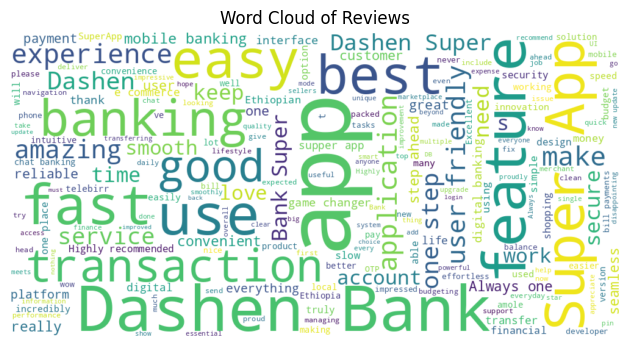

In [44]:
#Plot a word cloud of the reviews
viz.plot_wordcloud()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


[INFO] Saved plot: plots/rating_distribution.png


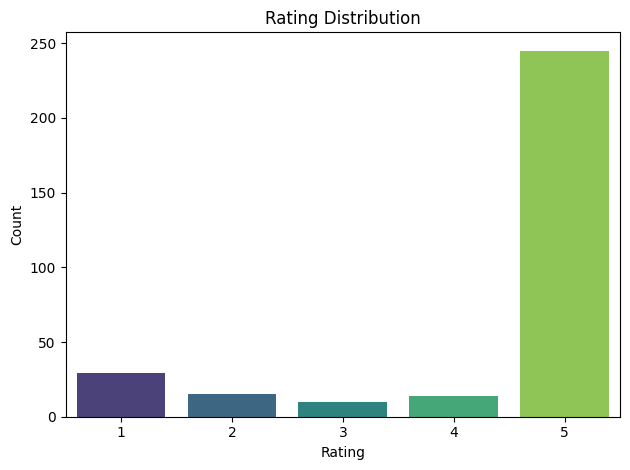

In [45]:
# Plot rating distribution
viz.plot_rating_distribution()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


[INFO] Saved plot: plots/thumbs_up_vs_rating.png


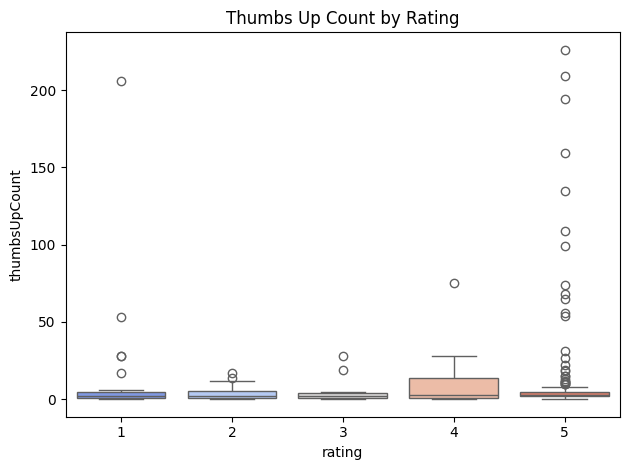

In [46]:
#Plot thumbs up against rating
viz.plot_thumbs_up_vs_rating()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


[INFO] Saved plot: plots/sentiment_vs_rating.png


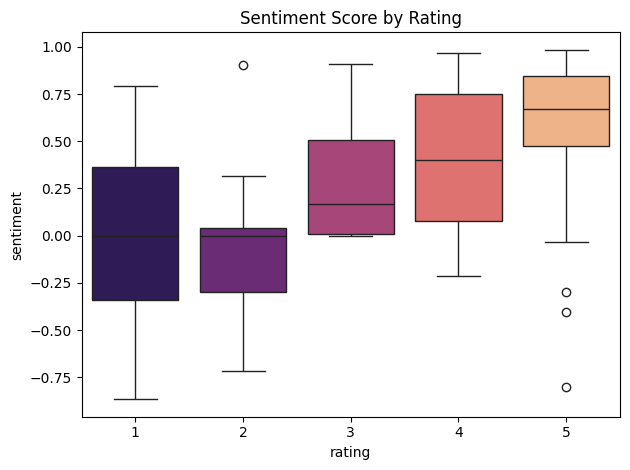

In [47]:
# Plot Sentiment against Ratin
viz.plot_sentiment_vs_rating()

In [48]:
df=dq.drop_columns(['userName','thumbsUpCount'])

[INFO] Dropped columns: ['userName', 'thumbsUpCount']


### Export Cleaned Data

In [49]:
# Save to csv
df.to_csv(CLEANED_DATA_PATH, index=False)

In [50]:
df.sample(15)

,review,rating,date,bank,source
208,Too best,1,2025-04-21 11:34:37,Dashen,Google Store
109,i love this app esp 3 click that make e-commer...,5,2025-04-22 13:24:34,Dashen,Google Store
23,"Simple, robust features? Yes, please! But the ...",2,2025-05-26 08:21:54,Dashen,Google Store
20,useless app ever loading take long,1,2025-05-27 09:19:32,Dashen,Google Store
381,Amizing Application love,5,2025-01-22 14:17:28,Dashen,Google Store
202,I am very impressed with the Dashen super app....,5,2025-04-21 11:42:01,Dashen,Google Store
205,it is the most amazing mobile app,5,2025-04-21 11:40:59,Dashen,Google Store
114,"The app has various usefull functions, which m...",5,2025-04-22 09:22:10,Dashen,Google Store
446,Always one step ahead,5,2025-01-13 09:15:03,Dashen,Google Store
380,Excellent banking app for all your needs! Who ...,5,2025-01-22 16:53:55,Dashen,Google Store
